### Attribute Information:
- age: Age of the person in years
- workclass: Employment type of the person
- fnlwgt: final weight
- education: Educational qualification of the person
- education-num: Number of years of education
- marital-status: Marital status of the person
- occupation: Occupation of the person
- relationship: Relationship status of the person/Role of the person in the family
- race: Human categorization of the person
- sex: Gender of the person
- capital-gain: capital gained
- capital-loss: capital loss
- hours-per-week: work hours per week
- native-country: Native country of the person
- salary: Salary of the person

The data has a salary column along with the other categories to predict the income of the people based on a demographic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

In [2]:
at = pd.read_csv('adult_test.csv')

In [3]:
ad = pd.read_csv('adult_data.csv')

In [4]:
at.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
at.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [6]:
ad.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
ad.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# How many unique types of "education" are there for the dataset "adult_data.csv"?
ad['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
# Which type of education is the most frequent for the dataset "adult_data.csv"?
ad['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [10]:
# The average value of "hours-per-week" for the dataset "adult_data.csv" lies: between 40 and 42
ad['hours-per-week'].mean() 

40.437455852092995

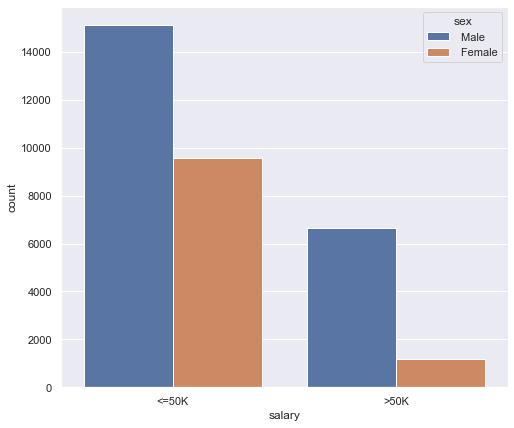

In [11]:
# Which is the correct plot for the salary and sex variables for the dataset "adult_data.csv"?
sns.set({'figure.figsize': (8,7)})
sns.countplot(data = ad, x='salary',hue='sex');

In [12]:
# Combine the two dataframes. (hint: use concat() function of Pandas). After combining, the new dataframe will be having shape = (48842, 15). Now, what is the value of average "hours-per-week"? between 40 and 42
# new_data = pd.concat([data, test], axis=0, ignore_index=True)
# new_data['hours-per-week'].mean()

In [13]:
adt=pd.concat([ad,at],axis=0,sort=False)

In [14]:
adt.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Which country ("native-country") has the highest mean value of "hours-per-week" for the dataset "adult_data.csv"?
# data.groupby(['native-country'])['hours-per-week'].mean().sort_values(ascending=False)
ad.groupby("native-country").mean().sort_values("hours-per-week",ascending=False).reset_index().head()

,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,Thailand,34.944444,184166.666667,10.944444,0.000000,0.000000,45.444444
1,France,38.965517,192050.896552,12.241379,547.034483,0.000000,45.068966
2,Yugoslavia,38.812500,215963.937500,9.937500,347.250000,0.000000,44.562500
3,Greece,46.206897,143466.206897,9.724138,1283.896552,295.448276,44.241379
4,Iran,39.418605,182211.395349,12.395349,2044.651163,126.813953,43.976744


In [16]:
# What is the average value of "capital-gain" for the dataset "adult_data.csv"? between 1000 and 1100
ad['capital-gain'].mean()

1077.6488437087312

<AxesSubplot:ylabel='Density'>

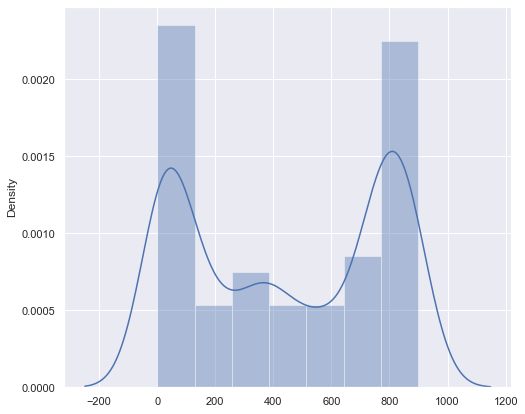

In [17]:
sns.distplot(ad.groupby('age').count())

<AxesSubplot:xlabel='age', ylabel='Count'>

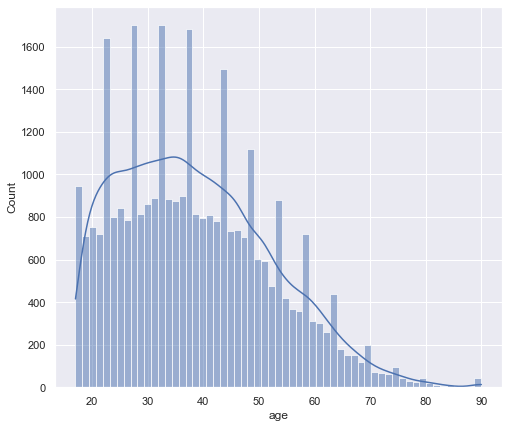

In [18]:
# What is the correct distribution of age for dataset "adult_data.csv"?
# sns.histplot(data['age'], kde=True)
sns.histplot(data=ad, x="age", kde=True)

<AxesSubplot:xlabel='age', ylabel='count'>

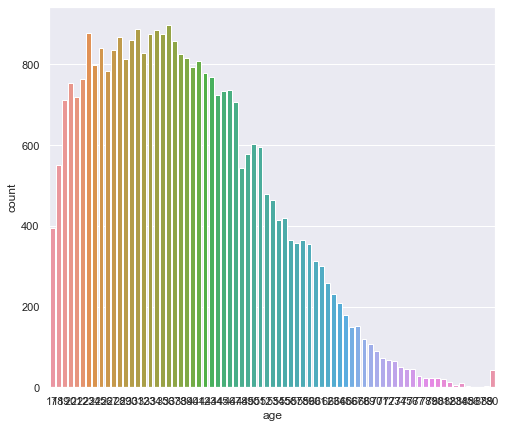

In [19]:
sns.countplot(ad['age'])

In [20]:
# How many people have capital loss greater than zero (0) in the dataset "adult_data.csv"?
# len(data[(data['capital-loss'] > 0)])
ad[ad['capital-loss']>0].count()

age               1519
workclass         1519
fnlwgt            1519
education         1519
education-num     1519
marital-status    1519
occupation        1519
relationship      1519
race              1519
sex               1519
capital-gain      1519
capital-loss      1519
hours-per-week    1519
native-country    1519
salary            1519
dtype: int64

In [21]:
# Which Occupation has the 2nd highest average working hours for dataset "adult_data.csv"? Exec-managerial
# data.groupby(['occupation'])['hours-per-week'].mean().sort_values(ascending=False)
ad.groupby("occupation").mean().sort_values("hours-per-week",ascending=False).reset_index().head()

,occupation,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940
1,Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703
2,Transport-moving,40.197871,190366.355041,8.767063,490.323732,81.480902,44.656230
3,Protective-serv,38.953775,202039.953775,10.184900,708.098613,78.334361,42.870570
4,Prof-specialty,40.517633,185296.613285,12.905072,2726.699517,136.139372,42.386715


In [22]:
ad['hours-per-week'].mean()

40.437455852092995

In [23]:
adt['hours-per-week'].mean()

40.422382375824085